In [52]:
#importar bibliotecas
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import  train_test_split
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
data = pd.read_csv('titanic.csv', delimiter=',')

display(data.head())

# res = O que pretendemos obter, caso a pessoa sobreviveu ou não.
# classe = a classe na qual a pessoa embarcou.
# sexo = 0 para masculino e 1 para feminino
# irmao/conjuges = Quantidade de irmaos ou conjuge a bordo.
# pais/filho = Quantidade de pais ou filhos a bordo.
# ataxa = Valor pago pelo ticket

,res,classe,sexo,idade,irmao/conjuges,pais/filho,taxa
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [31]:
# Total de dados
total = data.shape[0]

# Quantidade de colunas sem o 'res'
features = data.shape[1]-1

sobreviveu = len(data[data.res == 1])
faleceu = len(data[data.res == 0])

val = [sobreviveu, faleceu]

rate = (float(sobreviveu*100)/total)

print('Total de pessoas a bordo: ',total)
print('Numero de colunas: ',features)
print('Numero de sobreviventes: ',sobreviveu)
print('Numero de mortes: ',faleceu)
print('Percentual de sobreviventes: {:.2f}%'.format(rate))

Total de pessoas a bordo:  887
Numero de colunas:  6
Numero de sobreviventes:  342
Numero de mortes:  545
Percentual de sobreviventes: 38.56%


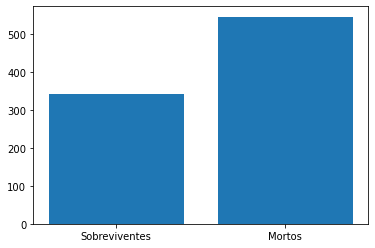

In [32]:
# Visualizando dados

x = np.arange(2)
plt.bar(x, val)
plt.xticks(x, ('Sobreviventes', 'Mortos'))
plt.show()


In [50]:
# Remover o resultado
features = data.drop(['res'],1)
labels = data['res']

# Convertendo 'idade' para inteiro
features['idade'] = features['idade'].apply('int64')

print('Features: ')
display(features.head())

print('Labels')
print(labels.head())

Features: 


,classe,sexo,idade,irmao/conjuges,pais/filho,taxa
0,3,0,22,1,0,7.2500
1,1,1,38,1,0,71.2833
2,3,1,26,0,0,7.9250
3,1,1,35,1,0,53.1000
4,3,0,35,0,0,8.0500


Labels
0    0
1    1
2    1
3    1
4    0
Name: res, dtype: int64


In [66]:
# Obter dados no formato correto

features_array = features.to_numpy()

print(features_array)

[[ 3.      0.     22.      1.      0.      7.25  ]
 [ 1.      1.     38.      1.      0.     71.2833]
 [ 3.      1.     26.      0.      0.      7.925 ]
 ...
 [ 3.      1.      7.      1.      2.     23.45  ]
 [ 1.      0.     26.      0.      0.     30.    ]
 [ 3.      0.     32.      0.      0.      7.75  ]]


In [74]:
# Realizando treinamento

X_train, X_test, y_train, y_test = train_test_split(features_array,labels)

print(X_train.shape)
print(X_test.shape)

(665, 6)
(222, 6)


In [75]:
# Criando o modelo
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [76]:
# Criando um valor de teste (2 classe, masculino, 26 anos, sem parentes e pagando 35 $)
X_new = np.array([[2, 0, 26, 0, 0, 35.0]])
X_new.shape

(1, 6)

In [89]:
prediction = knn.predict(X_new)

'Sobreviveria' if prediction[0] == 1 else 'Morreria'

# A partir dos dados, foi verificado que o usuário de teste sobreviveria.

'Sobreviveria'

In [90]:
#Criando outro teste

X2 = np.array([[3,1,78,2,1,78.8]])

prediction = knn.predict(X2)

'Sobreviveria' if prediction[0] == 1 else 'Morreria'

(1, 6)


'Morreria'

In [91]:
# Precisao do modelo (Quanto mais próximo de 1, melhor)
rate = knn.score(X_test, y_test)

print(f'Pontuação: {rate:.4f}')

Pontuação: 0.7207
